In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tickbars

In [4]:
raw_data = pd.read_csv('ESU13_tickdata.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%m/%d/%Y %H:%M:%S.%f')

In [6]:
imbalance = tickbars.tick_rule(data_indexed['price'])

In [7]:
ties = tickbars.TickImbalanceEvents(imbalance, 100000, imbalance.mean().item(), 2*1e-5)

In [8]:
tick_imb_tevents = ties.get_events()

In [9]:
tick_imb_tevents['time'] = data_indexed.loc[tick_imb_tevents.index, 'time']
tick_imb_tevents['time'] = pd.to_datetime(tick_imb_tevents['time'], format='%m/%d/%Y %H:%M:%S.%f')
tick_imb_tevents

,threshold,time
tevent,,
16687,777.683527,2013-09-02 01:29:20.608
45093,1969.733795,2013-09-02 07:42:21.716
89143,3405.194493,2013-09-03 03:54:55.838
603688,7102.239890,2013-09-03 22:34:25.061
972904,6205.098545,2013-09-04 14:59:53.967
1354567,5396.589066,2013-09-06 06:48:41.540
1564668,8032.682874,2013-09-06 09:04:06.459
1702393,9510.408546,2013-09-06 10:02:45.385
1982457,8653.176495,2013-09-09 05:59:53.462


In [49]:
statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})

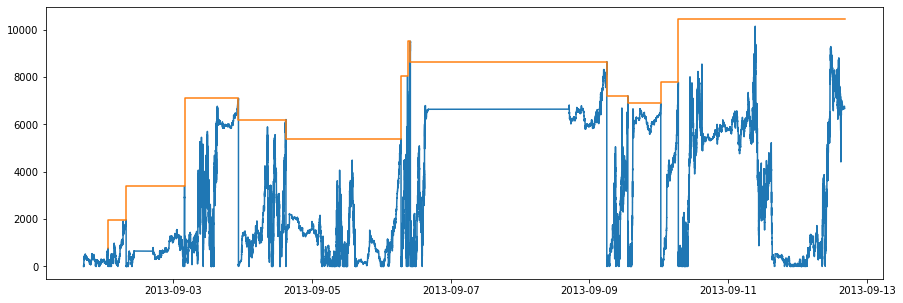

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(statistics['time'], statistics['value'])
plt.step(tick_imb_tevents['time'], tick_imb_tevents['threshold'], where='pre')
plt.show()

In [51]:
data_indexed['grp'] = 0
data_indexed.loc[tick_imb_tevents.index[:-1], 'grp'] = 1
data_indexed['grp'] = np.cumsum(data_indexed['grp'])
data_tick_vwap = tickbars.create_bars(data_indexed, 'grp', tickbars.compute_bar)

In [52]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-02 01:29:20.545,1640.25,1644.00,1639.00,1644.00,57732,1641.646357,30560.462,16687
1,2013-09-02 07:42:21.716,1644.00,1648.50,1642.25,1647.75,90575,1645.936950,22381.108,28406
2,2013-09-03 03:54:55.838,1647.75,1649.00,1642.50,1642.50,138319,1646.973511,72754.122,44050
3,2013-09-03 22:34:25.061,1642.50,1650.00,1630.75,1639.00,2027937,1640.121167,67169.223,514545
4,2013-09-04 14:59:53.967,1639.00,1654.75,1635.00,1651.75,1479136,1647.445468,59128.906,369216
5,2013-09-06 06:48:41.536,1651.75,1658.25,1648.50,1656.00,1470033,1654.262506,143327.569,381663
6,2013-09-06 09:04:06.459,1656.00,1663.50,1640.25,1640.25,805584,1652.415783,8124.919,210101
7,2013-09-06 10:02:45.385,1640.25,1658.50,1638.75,1658.00,523444,1649.116252,3518.926,137725
8,2013-09-09 05:59:53.414,1658.00,1664.00,1652.00,1656.50,1173889,1658.297188,244628.029,280064
9,2013-09-09 13:16:42.286,1656.50,1670.00,1656.00,1670.00,895242,1663.352675,26208.824,225497


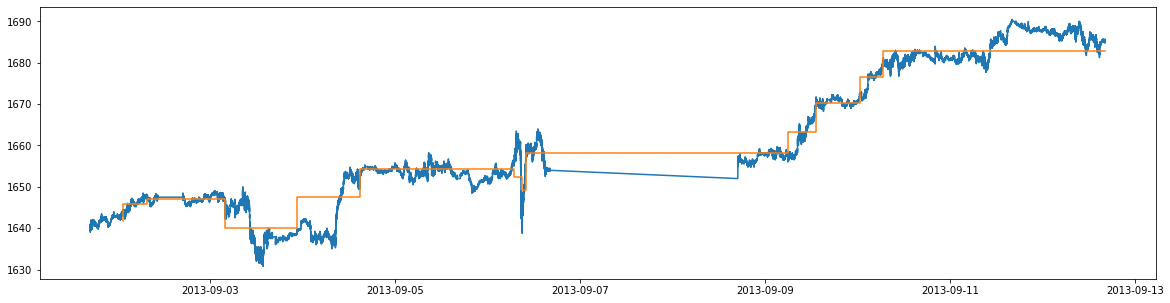

In [53]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price)
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre')
plt.show()